In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 



In [0]:

# Loading   Dataset 
dataset = pd.read_csv('/content/x06Simple.csv') 
dataset.head()
dataset.drop(["Index"],inplace=True,axis=1)

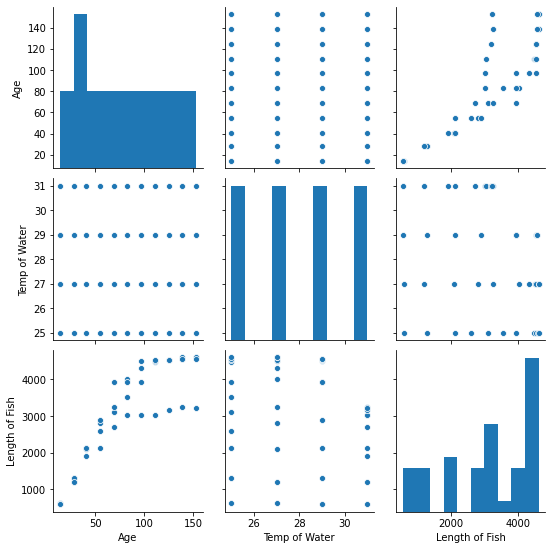

In [0]:

import seaborn 
seaborn.pairplot(dataset, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

In [0]:
df_x = dataset.drop(['Length of Fish'],axis=1)
df_y = dataset['Length of Fish']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size = 0.25,random_state=0) 

print("Train data shape of X = % s and Y = % s : "%( 
	x_train.shape, y_train.shape)) 

print("Test data shape of X = % s and Y = % s : "%( 
	x_test.shape, y_test.shape)) 


Train data shape of X = (33, 2) and Y = (33,) : 
Test data shape of X = (11, 2) and Y = (11,) : 


In [0]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(theta,X,y,lamda = 0.1, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

In [0]:
X = x_train.to_numpy()
y = y_train.to_numpy()
Y=y.reshape(-1,1)


(0.06309573444801933, 1584.893192461114, 3920.364019635259, 14743.804062207415)

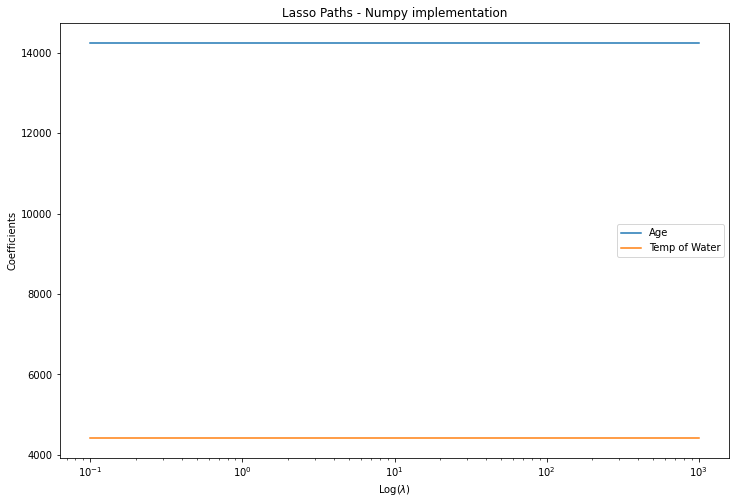

In [0]:
# Initialize variables
m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,4,300)/10 #Range of lambda values

#Run lasso regression for each lambda
for l in lamda:
    theta = coordinate_descent_lasso(initial_theta,X, Y,lamda = 0.3, num_iters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = dataset.columns[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')